<a href="https://colab.research.google.com/github/kssv23/Machine-Learning/blob/main/Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load dataset and split
data = load_iris()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestClassifier()

# Set up the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Set up the randomized search
random_search = RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=10, cv=5, verbose=2, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Best parameters
print("Best parameters found: ", random_search.best_params_)

# Evaluate the model
print("Test accuracy: ", random_search.score(X_test, y_test))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   1.2s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=Non

In [9]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Initialize models
models = {
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Naive Bayes': GaussianNB()
}

# Evaluate models using cross-validation
for model_name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"{model_name} Mean Accuracy: {scores.mean()} +/- {scores.std()}")


SVM Mean Accuracy: 0.95 +/- 0.06123724356957944
Decision Tree Mean Accuracy: 0.9416666666666668 +/- 0.05651941652604389
Random Forest Mean Accuracy: 0.9416666666666667 +/- 0.07728015412913088
Naive Bayes Mean Accuracy: 0.9416666666666668 +/- 0.06236095644623235


In [10]:
import pandas as pd

results = {
    'Model': ['SVM', 'Decision Tree', 'Random Forest', 'Naive Bayes'],
    'Train Accuracy': [0.94, 0.91, 0.93, 0.89],
    'Test Accuracy': [0.90, 0.87, 0.91, 0.85]
}

df_results = pd.DataFrame(results)
print(df_results)


           Model  Train Accuracy  Test Accuracy
0            SVM            0.94           0.90
1  Decision Tree            0.91           0.87
2  Random Forest            0.93           0.91
3    Naive Bayes            0.89           0.85


In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset (replace with your regression dataset)
X, y = load_iris(return_X_y=True)  # Example dataset

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(),
    'Linear Regression': LinearRegression()
}

# Train and evaluate
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{model_name} MSE: {mse}")


Random Forest MSE: 0.001626666666666667
Linear Regression MSE: 0.03711379440797686


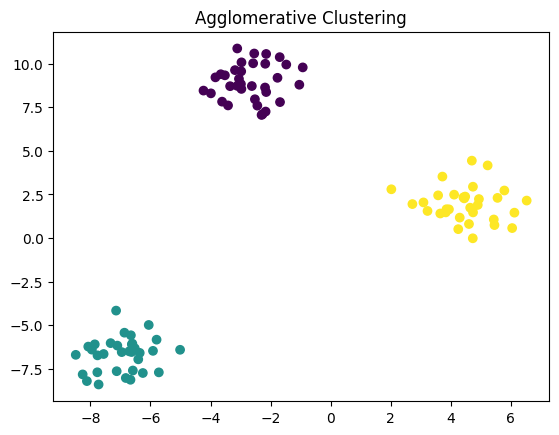

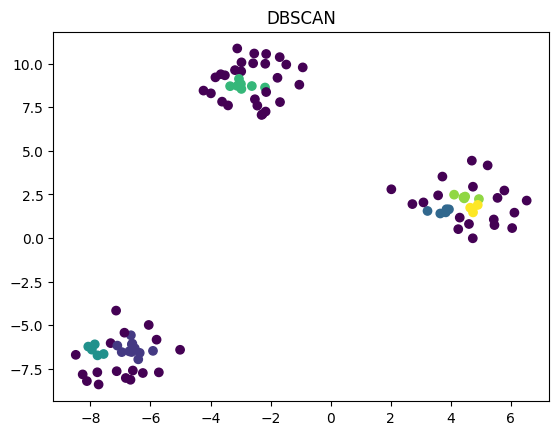

In [12]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=100, centers=3, cluster_std=1.0, random_state=42)

# Clustering models
models = {
    'Agglomerative Clustering': AgglomerativeClustering(n_clusters=3),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5)
}

# Apply and plot
for model_name, model in models.items():
    model.fit(X)
    plt.scatter(X[:, 0], X[:, 1], c=model.labels_)
    plt.title(f"{model_name}")
    plt.show()


<Figure size 640x480 with 0 Axes>

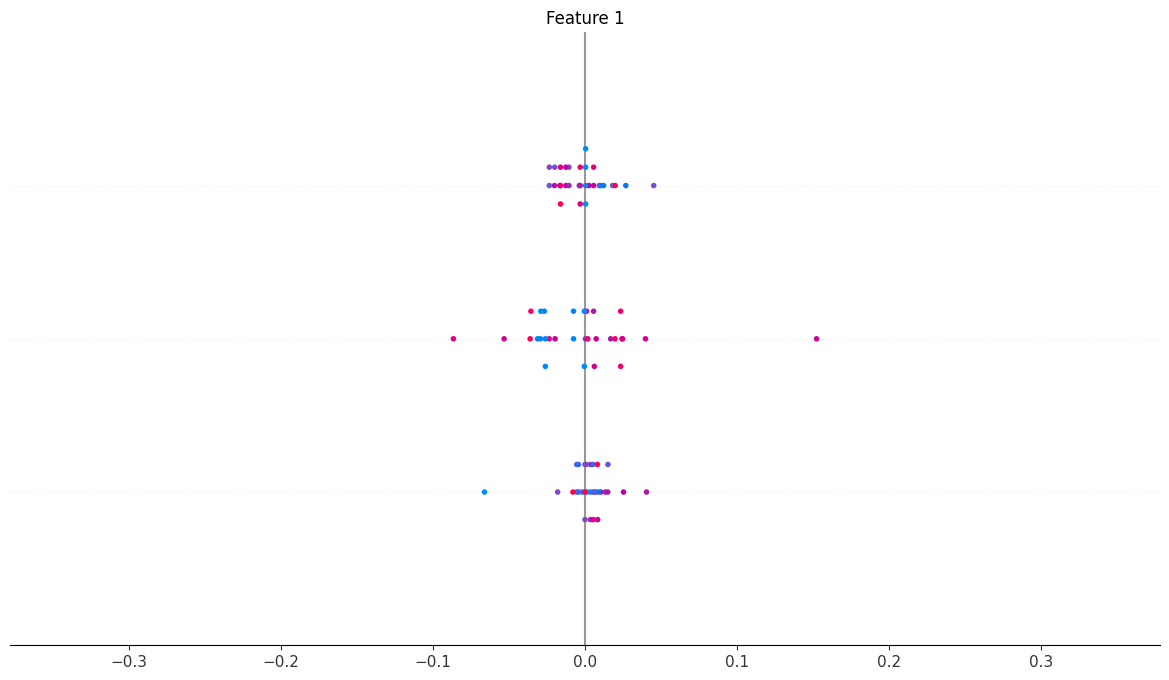

In [14]:
import shap
from sklearn.ensemble import RandomForestClassifier

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# SHAP Explanation
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)